# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 27, 2023 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import tests_hw5 # note: commented out as discussed here https://piazza.com/class/lcgo6c2ncl06el/post/419
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has cancer or not. It is important to catch this disease early to reduce mortality rate; late diagnosis will result in metastasis to other organs, which adversely impacts patient's prognosis. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|         | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 48 | 32 |
| **Actual no disease**       | 20 | 100 |


- Model B

|        | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 43 | 22 |
| **Actual no disease**       | 35 | 100 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

The positive class is likely to be the 'disease' class, with the 'predicted disease' being the predicted positive class (and the 'actual disease' being the actual positive class). This is because our task is to identify those with the disease, rather than those without the disease. The 'disease' class being smaller or rarer than the 'no disease' class also supports this, as we are usually trying to identify the rarer class and it is therefore labelled 'positive'.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = None
results_dict["B"]["accuracy"] = None

In [4]:
modelA_accuracy = (48+100)/(48+100+20+32)
modelB_accuracy = (43+100)/(43+100+35+22)
results_dict["A"]["accuracy"] = modelA_accuracy
results_dict["B"]["accuracy"] = modelB_accuracy
print("Model A accuracy:", results_dict["A"]["accuracy"])
print("Model B accuracy:", results_dict["B"]["accuracy"])

Model A accuracy: 0.74
Model B accuracy: 0.715


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Simply by the accuracy metric, model A performed better than model B, so I would choose model A.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [5]:
results_dict["A"]["precision"] = None
results_dict["B"]["precision"] = None
results_dict["A"]["recall"] = None
results_dict["B"]["recall"] = None
results_dict["A"]["f1"] = None
results_dict["B"]["f1"] = None

In [6]:
#precision = (TP/TP+FP)
modelA_precision = 48/(48+20)
modelB_precision = 43/(43+35)
#recall = (TP/TP+FN)
modelA_recall = 48/(48+32)
modelB_recall = 43/(43+22)
#f1 = 2*(prec*rec/prec+rec)
modelA_f1 = 2*((modelA_precision*modelA_recall)/(modelA_precision+modelA_recall))
modelB_f1 = 2*((modelB_precision*modelB_recall)/(modelB_precision+modelB_recall))

In [7]:
results_dict["A"]["precision"] = modelA_precision
results_dict["B"]["precision"] = modelB_precision
results_dict["A"]["recall"] = modelA_recall
results_dict["B"]["recall"] = modelB_recall
results_dict["A"]["f1"] = modelA_f1
results_dict["B"]["f1"] = modelB_f1

Show the dataframe with all results. 

In [8]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.740000,0.715000
precision,0.705882,0.551282
recall,0.600000,0.661538
f1,0.648649,0.601399


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Given the type of problem (early cancer diagnosis), which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

Answers:
1. Recall is more important than precision, because we want to catch as many of the cancer cases as we can, and false positives do not matter as much in this case. Someone with cancer being undiagnosed (a false negative) could lead to the disease getting worse and therefore would be less desireable than someone being told they have cancer when they do not (a fase positive). As recall accounts for false negatives, whereas precision focuses on fase positives, recall is more informative for this problem.
2. Based on this information, I would pick model B. Though it has lower accuracy, precision and f1 scores than model A, it has a significantly higher recall, which makes it more appropriate for this problem.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

Examples:
* Heart Attack Analysis & Prediction Dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 
    
    Recall would be appropriate for this dataset, which has a target feature that classifies samples by whether they are likely to have a heart attack or not. If the   dataset was to be used to train a model that would identify which patients were likely to have a heart attack, false positives would usually not be as important as false negatives (as the patient may die if not identified). Therefore recall would be more important than f1, precision, or accuracy.

* Spam Email Data original & CSV file (Spamassassin) https://www.kaggle.com/datasets/cesaber/spam-email-data-spamassassin-2002
    
    False negatives (saying an email is not spam when it is) could be very bad here, as it would lead the spam to end up in the inbox and could lead to annoyance or even danger of e.g. getting a virus. However, false positives could possibly be even worse, as a very strict spam filter may cause real (ham) emails to not appear in the inbox, which would be a big incovenience for the user. A model with a high number of false positives but very low number of false negatives may have a high accuracy, but this would be misleading about the usability of the model. In this case, f1 score may be more informative, as it considers bot precision and recall without assuming that false negatives and false positives have an equal cost (as accuracy does).

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [9]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [10]:
train_df["churn"].value_counts()

False    1984
True      349
Name: churn, dtype: int64

There is class imbalance, as the number of samples with churn=True are much lower than ones with churn=False.

This is likely due to the churn=True class being more rare than churn=False, as most customers don't unsubscribe. Therefore, we may want to do something about the imbalance if we care more about one type of error over another. In this case, we may care more about identifying the customers that unsubscribed (churn=True) than those who didn't (churn=False). Then, false positives matter less than false negatives, as a false negative means we missed someone who would unsubscribe. Therefore recall would be more important than precision, as it accounts for false positives. We could deal with this by reweighting the classes or using other methods.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

In [11]:
#code based on lecture 10

from pandas_profiling import ProfileReport

profile = ProfileReport(train_df, title="Pandas Profiling Report")  # , minimal=True)
profile. to_file("HW5 Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Olsen L\.conda\envs\cpsc330\lib\site-packages\multimethod\__init__.py:184: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return self[tuple(map(self.get_type, args))](*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Questions:
1. What is the relationship between voice mail plan and vmail messages? If they are measuring similar things it may be uneccessary to include them both in the model.
2. Which variables have the strongest covariance with churn?

<br><br>

### 2.3 Column transformer 
rubric={points:14}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

For each group of features (e.g. numeric, categorical or else) explain why you are applying the particular transformation. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

Finally, fit `ColumnTransformer` on your training set; and use the `ColumnTransformer` to transform your train data.

In [12]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [13]:
#code based on lecture 6
numeric_features = [
    "account length",
    "number vmail messages",
    "total day minutes",
    "total day calls",
    "total day charge",
    "total eve minutes",
    "total eve calls",
    "total eve charge",
    "total night minutes",
    "total night calls",
    "total night charge",
    "total intl minutes",
    "total intl calls",
    "total intl charge",
    "customer service calls"
]
    
    
categorical_features = [
    "state",
    "area code",
    "international plan", #bool
    "voice mail plan" #bool
]
    
drop_features = [
    "phone number"
]

target = "churn"

In [14]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop='if_binary')
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)

Explanation:
* No imputation was needed as there was no missing data
* Scaling was used to make sure the different units of measurement for all the different numeric features did not matter, and they could be compared on the same scale.
* All the categorical features except for phone number, as well as the binary features (state, area code, international plan and voice mil plan) were transformed using one-hot encoding to convert the values into numeric columns so that a classifier can use them. Binary features were included here as the same tranformations are done to them as to the categorical variables, with drop=if_binary so that one of the two columns created for binary features could be dropped. This helps reduce redundancy in the processed dataset.
* Phone number was dropped as it was unique for every sample and unlikely to help with prediction. 


<br><br>

<br><br>

### 2.4 area code feature
rubric={points:4}

The original dataset had a feature called `area code`.

1. The area codes are numbers. Does it make sense to encode them as one-hot-endoded (OHE) or not? Please justify your response.
2. What were the possible values of `area code`? 
3. If area code is encoded with OHE, how many new features are created to replace it?

Answer:
1. It makes sense to use OHE, as they should not be analysed for their numerical value but rather considered as separate categories.
2. The values are '415', '408' and '510'.
3. It will be converted into three new features, one for each value. If the original column is removed, there will be a total of two more columns. 

<br><br>

### 2.5 Logistic regression
rubric={points:12} 

**Your tasks:**

1. Report the cross-validation results of a `LogisticRegression` model, with default Hparams, on the following metrics: `"accuracy", "precision", "recall", "f1"`
2. Are you satisfied with the results? Explain why or why not. Discuss in a few sentences. 

In [15]:
#code based on lecture 9
scoring = ["accuracy", "f1", "recall", "precision"]
pipe = make_pipeline(preprocessor, LogisticRegression())
scores = cross_validate(pipe, X_train, y_train, scoring=scoring)
pd.DataFrame(scores).mean()
#pd.DataFrame(scores)

fit_time          0.038890
score_time        0.008178
test_accuracy     0.855978
test_f1           0.302739
test_recall       0.209317
test_precision    0.548663
dtype: float64

The results are not very satisfying, as while the accuracy score is high, the recall, precision and f1 scores are all very low. Recall is especially low, but if identifying those with churn=True is more important than churn=False, then recall may be more important than precision as false negatives may be worse than false positives. Thus these results are not good. 

These results may be due to the positive target class being much rarer than the negative class, leading to high accuracy (as the classifier correctly classifies most of the negative samples) but low precision and recall.

<br><br>

### 2.6 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences while comparing the metrics of this model and the previous model.

In [16]:
pipe_balanced = make_pipeline(preprocessor, LogisticRegression(class_weight="balanced"))
scores_balanced = cross_validate(pipe_balanced, X_train, y_train, scoring=scoring)
pd.DataFrame(scores_balanced).mean()
#pd.DataFrame(scores_balanced)

fit_time          0.048272
score_time        0.008783
test_accuracy     0.760807
test_f1           0.467027
test_recall       0.699213
test_precision    0.351154
dtype: float64

**Comparison of the mean CV scores from logistic regression with unbalanced and balanced class weights:**

In [17]:
scores1 = pd.DataFrame(scores).mean()
scores2 = pd.DataFrame(scores_balanced).mean()
scores1.to_frame().join(scores2.to_frame(), lsuffix="_unbalanced", rsuffix="_balanced")

,0_unbalanced,0_balanced
fit_time,0.038890,0.048272
score_time,0.008178,0.008783
test_accuracy,0.855978,0.760807
test_f1,0.302739,0.467027
test_recall,0.209317,0.699213
test_precision,0.548663,0.351154


Accuracy and precision dropped, but recall improved, as did the f1 score. Even though precision dropped, the f1 score improving shows that the improvement in recall was large enough that if precision and recall are equally important, then this model performs better than the previous one. 

Additionally, if the goal is to identify those with churn=True, recall is more important than precision and accuracy. As recall is much better here, this would be a more useful model for this goal.

<br><br>

### 2.7 Hyperparameter optimization
rubric={points:10}

1. Jointly optimize `C` and `class_weight` with `GridSearchCV` and `scoring="f1"`.
  - For `class_weight`, consider 3 values: 
    - `None` (no weight)
    - "weight of class 0 = 1"  and  "weight of class 1 = 3"
    - '`balanced`'
  - For `C`, choose some reasonable values
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [18]:
#code based on lecture 8

param_grid = {
    "logisticregression__class_weight":  ["None", {0:1, 1:3}, "balanced"],
    "logisticregression__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, n_jobs=-1, scoring="f1", return_train_score=True
)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'charge',
                                                                          'total '
                                                                          'eve '
                                                                          'minutes',
                                                                          'total '
                                                                          'eve '
                                                                          'calls',
                                                                          'total '
                                                                          'eve '
                                                                          'charge',
                                                                          'total '
                                                                          'night '
                                                                          'minutes',
                                                                          'total '
                                                                          'night '
                                                                          'calls',
                                                                          '...
                                                                                       handle_unknown='ignore'),
                                                                         ['state',
                                                                          'area '
                                                                          'code',
                                                                          'international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['phone '
                                                                          'number'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
      

In [20]:
grid_search.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__class_weight': {0: 1, 1: 3}}

In [21]:
grid_search.best_score_

0.4901064071511795

Answer for 2:

The value chosen for C is 0.1, and for class_weight is "weight of class 0 = 1" and "weight of class 1 = 3". The best cross-validation score, with scoring="f1", is 0.49.



<br><br>

### 2.8 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Plot Confusion matrix
    - Plot Precision-recall curve 
    - Calculate average precision score
    - Plot ROC curve
    - Report AUC score
3. Comment on the AUC score and give an intuitive explanation of what this value of AUC means for this problem.

**Confusion matrix**

C:\Users\Olsen L\.conda\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


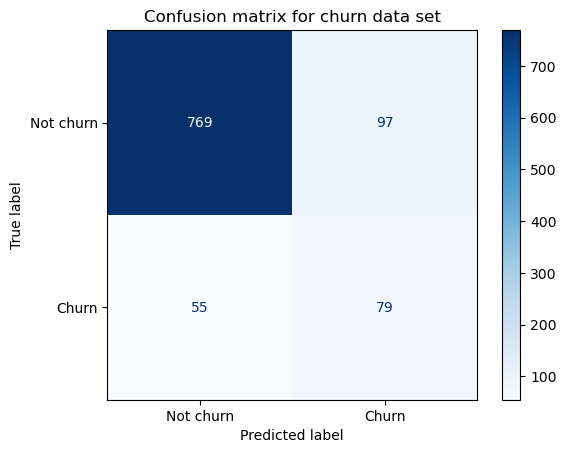

In [22]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay

pipe_best = make_pipeline(preprocessor, LogisticRegression(C=0.1, class_weight={0: 1, 1: 3}))
pipe_best.fit(X_train, y_train)
plot_confusion_matrix(
    pipe_best,
    X_test,
    y_test,
    display_labels=["Not churn", "Churn"],
    values_format="d",
    cmap=plt.cm.Blues,
)
plt.title("Confusion matrix for churn data set")
plt.show()

**PR curve**

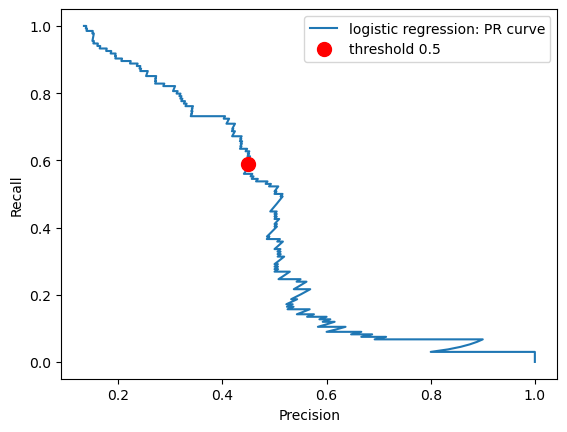

In [23]:
#code based on lecture 9
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, pipe_best.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, pipe_best.predict(X_test)),
    recall_score(y_test, pipe_best.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

**Average precision score**

In [24]:
from sklearn.metrics import average_precision_score

ap_lr = average_precision_score(y_test, pipe_best.predict_proba(X_test)[:, 1])
print("Average precision score: {:.3f}".format(ap_lr))

Average precision score: 0.465


**ROC curve**

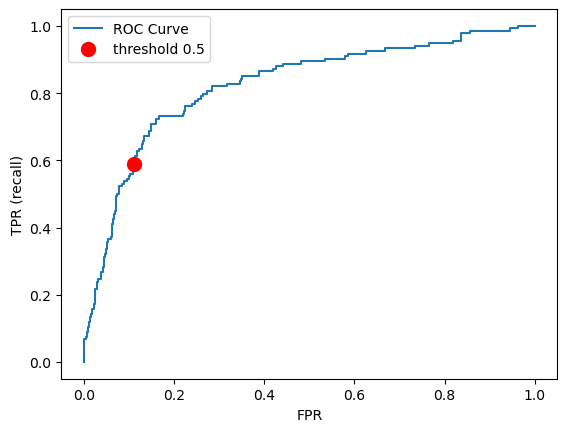

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pipe_best.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

**AUC score**

In [26]:
from sklearn.metrics import roc_auc_score

roc_lr = roc_auc_score(y_test, pipe_best.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(roc_lr))

AUC: 0.824


The AUC is fairly high, which means that a randomly picked positive point is likely to have a higher score according to the classifier than a randomly picked point from the negative class. This means that it is possible for the classifier to distinguish fairly well between the two closes, though the exact number of false positives and false negatives that will be present depends on the threshold chosen.

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [27]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (75%) and test (25%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` to train and test splits. 

In [28]:
calhousing_train_df, calhousing_test_df = train_test_split(housing_df, test_size=0.25, random_state=123)

In [29]:
calhousing_train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19995,1.0349,6.0,4.165217,0.982609,734.0,3.191304,36.19,-119.35,0.678
17889,4.7625,13.0,5.265207,1.002433,1087.0,2.644769,37.41,-121.95,1.375
1977,3.5192,9.0,8.747475,1.845118,796.0,2.680135,38.61,-120.44,0.980
6861,2.8672,30.0,4.635616,1.090411,1130.0,3.095890,34.06,-118.13,1.985
11247,4.1276,13.0,4.429936,0.963376,1749.0,2.785032,33.81,-118.00,1.538


In [30]:
calhousing_train_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [31]:
#No missing data, all numeric columns
calhousing_preprocessor = StandardScaler()

In [32]:
calhousing_X_train = calhousing_train_df.drop(columns=["MedHouseVal"])
calhousing_y_train = calhousing_train_df["MedHouseVal"]

calhousing_X_test = calhousing_test_df.drop(columns=["MedHouseVal"])
calhousing_y_test = calhousing_test_df["MedHouseVal"]

<br><br>

### 3.2 Baseline: Linear Regression 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `sklearn.linear_model.LinearRegression` with default scoring. 
2. What metric is used for scoring by default? 

In [33]:
from sklearn.linear_model import LinearRegression

calhousing_pipe = make_pipeline(calhousing_preprocessor, LinearRegression())
calhousing_scores = cross_validate(calhousing_pipe, calhousing_X_train, calhousing_y_train, return_train_score=True)
#pd.DataFrame(calhousing_scores).mean()

The default scoring metric for sklearn cross validation is accuracy. 

<br><br>

### 3.3 Random Forest Regressor
rubric={points:7}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for two model (`models`) and five evaluation metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [34]:
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "neg_mean_absolute_percentage_error": "neg_mean_absolute_percentage_error",
}

**Results for models Ridge (first dataframe) and Random Forest (second dataframe), across different scoring metrics.**

In [35]:
for model in models.values():
    new_pipe = make_pipeline(calhousing_preprocessor, model)
    new_scores = cross_validate(new_pipe, calhousing_X_train, 
                                calhousing_y_train, 
                                scoring = score_types_reg)
    display(pd.DataFrame(new_scores))

,fit_time,score_time,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_r2,test_neg_mean_absolute_percentage_error
0,0.008975,0.004986,-0.549963,-0.741595,-0.539838,0.608633,-0.321621
1,0.004987,0.002992,-0.539582,-0.734563,-0.544145,0.599232,-0.319187
2,0.004987,0.002991,-0.509989,-0.714135,-0.522755,0.616812,-0.313360
3,0.004986,0.002993,-0.538532,-0.733847,-0.536827,0.592940,-0.322003
4,0.004987,0.002991,-1.255748,-1.120602,-0.536979,0.014994,-0.320155


,fit_time,score_time,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_r2,test_neg_mean_absolute_percentage_error
0,7.138264,0.079787,-0.258277,-0.508209,-0.337272,0.816204,-0.195894
1,6.768867,0.093750,-0.274450,-0.523880,-0.341666,0.796156,-0.186311
2,7.129336,0.091755,-0.251475,-0.501472,-0.328419,0.811051,-0.185871
3,7.377199,0.082780,-0.284333,-0.533229,-0.346159,0.785081,-0.195133
4,6.707043,0.080784,-0.271897,-0.521438,-0.337335,0.786725,-0.190981


In [36]:
base_pipe = make_pipeline(calhousing_preprocessor, LinearRegression())
base_scores = cross_validate(base_pipe, calhousing_X_train, 
                            calhousing_y_train, 
                            scoring = score_types_reg)
display(pd.DataFrame(base_scores))

,fit_time,score_time,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_r2,test_neg_mean_absolute_percentage_error
0,0.007978,0.004987,-0.550005,-0.741624,-0.539838,0.608602,-0.321621
1,0.006981,0.001995,-0.539571,-0.734555,-0.544146,0.599240,-0.319198
2,0.004988,0.002990,-0.509984,-0.714132,-0.522756,0.616816,-0.313362
3,0.005984,0.002992,-0.538520,-0.733839,-0.536830,0.592949,-0.322015
4,0.005984,0.001995,-1.255578,-1.120526,-0.536993,0.015128,-0.320178


*Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics?*
Random forest does better in all the metrics. It is hard to compare to the baseline score from part 3.2 as the only score found there is accuracy, which is not very relevant to regression and also not found for the models above. 
If the above metrics are computed for the baseline model, it appears that it performs similar to Ridge and not as well as Random Forest.

<br><br>

### 3.4 Hyperparameter optimization 
rubric={points:1}

1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose `neg_mean_absolute_percentage_error` as the HParam optimization metric.

2. What was the best `alpha` hyper-parameter found?

In [37]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [38]:
#code based on lecture 8
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
random_search = RandomizedSearchCV(
    ridge_pipe, param_dist, cv=5, n_jobs=-1, random_state=123,
    scoring="neg_mean_absolute_percentage_error", return_train_score=True
)

In [39]:
random_search.fit(calhousing_X_train, calhousing_y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   n_jobs=-1,
                   param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002592BC99810>},
                   random_state=123, return_train_score=True,
                   scoring='neg_mean_absolute_percentage_error')

In [40]:
print("Best alpha value found:", random_search.best_params_['ridge__alpha'])

Best alpha value found: 20.740241962891858


<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

Test the best model (from 3.4) on the test set based on the `neg_mean_absolute_percentage_error` score.

In [41]:
print("Neg mean abs perentage error for best model:", random_search.score(calhousing_X_test, calhousing_y_test))

Neg mean abs perentage error for best model: -0.3162384107562752


<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Explore coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: 
   - features 
   - coefficients
2. Increasing which feature values would result in higher housing price? 

In [42]:
ridge_coefs = pd.DataFrame(columns = ["features", "coefficients"])
ridge_coefs["features"] = calhousing_X_train.columns
ridge_coefs["coefficients"] = random_search.best_estimator_['ridge'].coef_

In [43]:
ridge_coefs

,features,coefficients
0,MedInc,0.834501
1,HouseAge,0.119523
2,AveRooms,-0.271909
3,AveBedrms,0.308059
4,Population,-0.002577
5,AveOccup,-0.042213
6,Latitude,-0.878016
7,Longitude,-0.847449


Increasing MedInc, HousAge, or AveBedrms would result in higher housing prices, as they have positive coefficients.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 